# Perdiz arrow points

In [1]:
# load analysis packages
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# read data
perdiz = pd.read_csv('perdizsite.csv')
perdiz.head()

,spec,site,region,maxl,maxw,maxth,maxstl,maxstw
0,554,41cp12,north,25.40,12.18,3.82,5.75,3.84
1,555,41cp12,north,22.92,12.87,3.54,3.71,3.69
2,556,41cp12,north,24.09,11.87,3.61,5.15,4.78
3,559,41cp12,north,25.01,10.57,3.50,5.84,3.88
4,562,41cp12,north,22.10,10.45,3.47,3.77,3.43


### select features and response

In [2]:
# attributes for analysis
feature_cols = ['maxl', 'maxw', 'maxth', 'maxstl', 'maxstw']
X = perdiz[feature_cols]

# cast from string to int
reg_num = {'north':0, 'south':1}
perdiz['reg_num'] = perdiz.region.map(reg_num)
perdiz.head()
y = perdiz.reg_num

### scatterplot

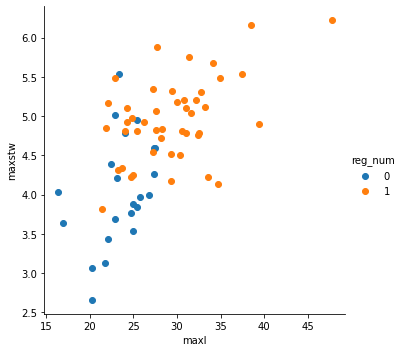

In [3]:
sns.FacetGrid(perdiz, hue="reg_num", height=5) \
   .map(plt.scatter, "maxl", "maxstw") \
   .add_legend()
plt.show()

### ensure that features and responses are numeric

In [4]:
X.dtypes

maxl      float64
maxw      float64
maxth     float64
maxstl    float64
maxstw    float64
dtype: object

In [5]:
y.dtypes

dtype('int64')

### split data for train/test

In [6]:
# split data into train/test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50, 5)
(17, 5)
(50,)
(17,)


## decrease sensitivity of algorithm to outliers through standardizing features

In [7]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### k-fold cross validation of training dataset

In [8]:
logreg = LogisticRegression()
scores = cross_val_score(estimator = logreg, X = X_train_std, y = y_train,
                         cv = 10, n_jobs = 1)
print(scores)
print(scores.mean(), scores.std())

[0.8 1.  1.  1.  0.8 1.  0.6 0.6 1.  0.8]
0.86 0.15620499351813308


### fit model on training set

In [9]:
logreg.fit(X_train_std, y_train)

LogisticRegression()

### make predictions + evaluate accuracy

In [10]:
y_pred = logreg.predict(X_test_std)
print(metrics.accuracy_score(y_test, y_pred))

# what attributes are driving the differences between the regions?
logreg.coef_

1.0


array([[ 1.12252257,  0.55533211, -0.3909616 , -0.65467823,  1.47512851]])